# HOUSE PRICE PREDICTION

## Import & Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Ames_raw_data.csv")

In [8]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [11]:
df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

## Finding Outliers

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

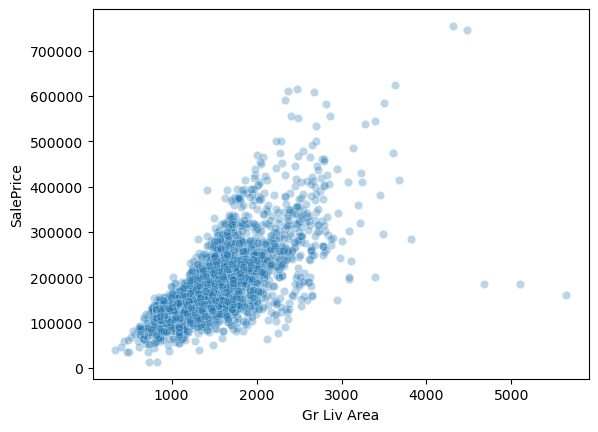

In [15]:
sns.scatterplot(data=df, x="Gr Liv Area", y="SalePrice", alpha=0.3)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

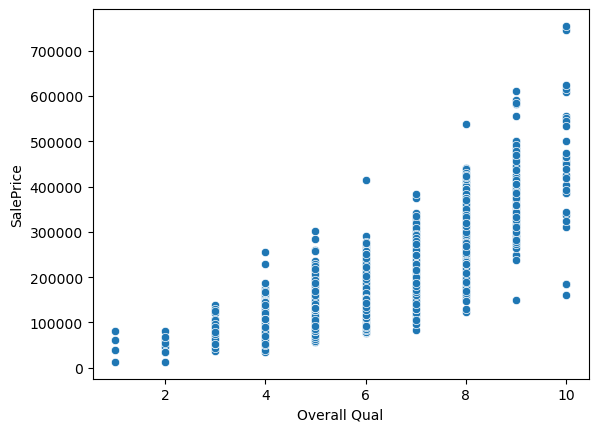

In [16]:
sns.scatterplot(data=df, x="Overall Qual", y="SalePrice")

In [17]:
df[(df["Gr Liv Area"]>4000) & (df["SalePrice"]< 400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


## Missing Data

In [19]:
df =  df.drop("PID", axis=1)


In [20]:
df.isna().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [26]:
def missing(df):
    percentile= df.isnull().sum() * 100 / len(df)
    percentile = percentile [percentile >0 ].sort_values()

    return percentile

In [27]:
missing(df)

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [28]:
missing_data = missing(df)

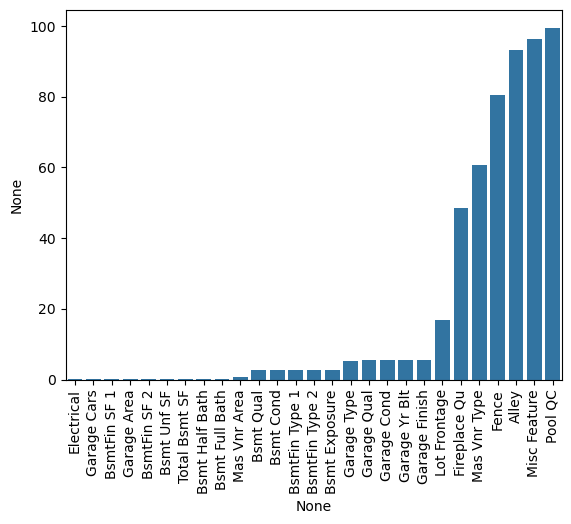

In [30]:
sns.barplot(x=missing_data.index, y = missing_data)
plt.xticks(rotation=90);

In [31]:
missing_data[missing_data < 3 ].index

Index(['Electrical', 'Garage Cars', 'BsmtFin SF 1', 'Garage Area',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure'],
      dtype='object')

In [33]:
df.dropna(subset = ['Electrical', 'Garage Cars', 'BsmtFin SF 1', 'Garage Area',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath',
       'Bsmt Full Bath', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure'], inplace= True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2821 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2821 non-null   int64  
 1   MS Zoning        2821 non-null   object 
 2   Lot Frontage     2351 non-null   float64
 3   Lot Area         2821 non-null   int64  
 4   Street           2821 non-null   object 
 5   Alley            194 non-null    object 
 6   Lot Shape        2821 non-null   object 
 7   Land Contour     2821 non-null   object 
 8   Utilities        2821 non-null   object 
 9   Lot Config       2821 non-null   object 
 10  Land Slope       2821 non-null   object 
 11  Neighborhood     2821 non-null   object 
 12  Condition 1      2821 non-null   object 
 13  Condition 2      2821 non-null   object 
 14  Bldg Type        2821 non-null   object 
 15  House Style      2821 non-null   object 
 16  Overall Qual     2821 non-null   int64  
 17  Overall Cond     28

In [37]:
missing_data = missing(df)

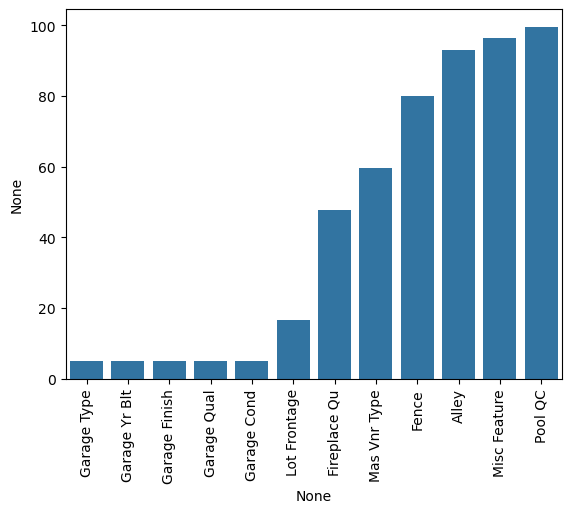

In [38]:
sns.barplot(x=missing_data.index, y = missing_data)
plt.xticks(rotation=90);

In [39]:
missing_data[missing_data < 99.9 ].index

Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Mas Vnr Type', 'Fence',
       'Alley', 'Misc Feature', 'Pool QC'],
      dtype='object')

In [40]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Mas Vnr Type', 'Fence',
       'Alley', 'Misc Feature', 'Pool QC']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond,Lot Frontage,Fireplace Qu,Mas Vnr Type,Fence,Alley,Misc Feature,Pool QC
0,Attchd,1960.0,Fin,TA,TA,141.0,Gd,Stone,NaN,NaN,NaN,NaN
1,Attchd,1961.0,Unf,TA,TA,80.0,NaN,NaN,MnPrv,NaN,NaN,NaN
2,Attchd,1958.0,Unf,TA,TA,81.0,NaN,BrkFace,NaN,NaN,Gar2,NaN
3,Attchd,1968.0,Fin,TA,TA,93.0,TA,NaN,NaN,NaN,NaN,NaN
4,Attchd,1997.0,Fin,TA,TA,74.0,TA,NaN,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA,37.0,NaN,NaN,GdPrv,NaN,NaN,NaN
2926,Attchd,1983.0,Unf,TA,TA,NaN,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,MnPrv,NaN,Shed,NaN
2928,Attchd,1975.0,RFn,TA,TA,77.0,TA,NaN,NaN,NaN,NaN,NaN


In [41]:
df.drop(['Fireplace Qu', 'Mas Vnr Type', 'Fence',
       'Alley', 'Misc Feature', 'Pool QC'], axis=1 , inplace=True)

In [43]:
df.fillna({
    "Garage Type" : "None",
    "Garage Finish" : "None",
    "Garage Qual" : "None",
    "Garage Cond" : "None"
} , inplace=True )

In [45]:
df.fillna({
    "Lot Frontage" : 0,
    "Garage Yr Blt" : 0
} , inplace=True )

In [46]:
df.isna().sum().sum()

np.int64(0)

## Heatmap

<Axes: >

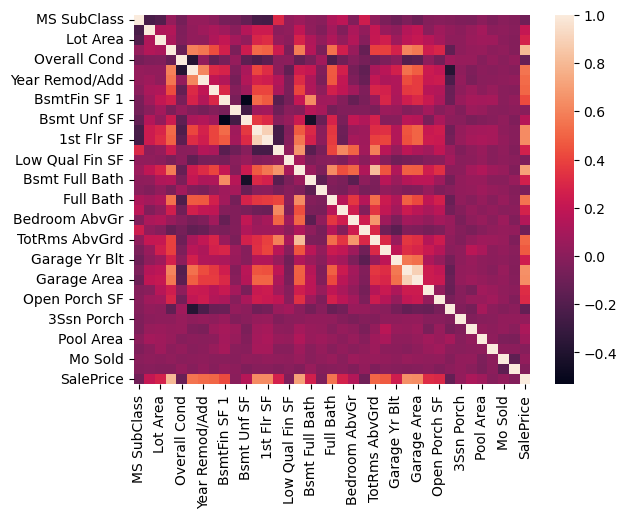

In [48]:
sns.heatmap(df.corr(numeric_only=True))

## Grid Search

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [51]:
len(df)

2821

## Dummy Variables

In [55]:
df = pd.get_dummies(df, drop_first=True)

In [56]:
df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,20,0.0,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [58]:
X= df.drop("SalePrice", axis=1)
y= df["SalePrice"]

In [59]:
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                   test_size = 0.1,
                                                   random_state = 9 
                                                   )

In [60]:
scaler = StandardScaler()
scaled_X_train =scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [61]:
scaled_X_train

array([[-0.87887412, -1.72124528,  0.12171389, ..., -0.12654173,
         0.4535424 , -0.29956316],
       [-0.87887412, -1.72124528,  0.74190391, ..., -0.12654173,
         0.4535424 , -0.29956316],
       [ 0.05325397,  0.96977986,  0.11438304, ..., -0.12654173,
         0.4535424 , -0.29956316],
       ...,
       [ 0.05325397, -0.37573271, -0.08012888, ..., -0.12654173,
         0.4535424 , -0.29956316],
       [ 0.05325397, -1.72124528, -0.04384117, ..., -0.12654173,
         0.4535424 , -0.29956316],
       [ 0.51931801, -1.72124528,  0.03960836, ..., -0.12654173,
        -2.2048655 , -0.29956316]])

In [62]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [63]:
elastic_model = ElasticNet()

## Model Comparison

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Model 1 - Non Scaled Model

In [68]:
param_grid = {
    "alpha" : [0.1, 1, 3, 10 , 30 ,100],
    "l1_ratio" : [0.1, 0.5, 0.7, 0.95, 0.99, 1]
}

In [69]:
grid_model_1 = GridSearchCV(
    estimator= elastic_model,
    param_grid= param_grid,
    scoring= "neg_mean_squared_error",
    cv=5,
    verbose = 2
)

In [92]:
grid_model_1.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.642e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.706e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.692e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.721e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.773e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.953e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.723e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.268e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.835e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.974e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.778e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.359e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.247e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.409e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.047e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.636e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.157e+10, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.379e+10, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.299e+10, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.962e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.143e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.630e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.279e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.026e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.280e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.522e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.292e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.723e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.115e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.372e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.411e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.611e+10, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.4s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.696e+10, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.455e+10, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.093e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.260e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.675e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.083e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.396e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.308e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.376e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.051e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.274e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.102e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.517e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.7; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=3, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.242e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.623e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.658e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.870e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.994e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=3, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+09, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=3, l1_ratio=0.99; total time=   0.4s
[CV] END .............................alpha=3, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=3, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=3, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=3, l1_ratio=0.99; total time=   0.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.356e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.291e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.437e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.005e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.626e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.450e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.375e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.321e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.264e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.218e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.661e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.750e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.957e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.795e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+10, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.4s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.3s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.427e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.6s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.495e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.293e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.152e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.077e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.481e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.900e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.767e+10, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.954e+10, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.3s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.1s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.155e+10, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.599e+10, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.270e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.598e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.376e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.181e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+12, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+12, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+12, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+12, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+12, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.469e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.006e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.204e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.266e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=100, l1_ratio=0.95; total time=   0.4s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=100, l1_ratio=0.99; total time=   0.0s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.836e+10, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.5s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.1s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.3s
[CV] END ..............................alpha=100, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.637e+10, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 3, 10, 30, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [72]:
pred_1 = grid_model_1.predict(X_test)

In [77]:
print("MAE  : ", mean_absolute_error(y_test, pred_1))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_1)))

MAE  :  14976.388379751228
RMSE :  22001.065990369123


In [75]:
y_test.mean()

np.float64(178334.06360424028)

In [76]:
y.mean()

np.float64(182403.64374335343)

In [79]:
mean_absolute_error(y_test, pred_1) / y.mean()

np.float64(0.0821057522338939)

### Model 2 - Scaled Model

In [80]:
grid_model_2 = GridSearchCV(
    estimator= elastic_model,
    param_grid= param_grid,
    scoring= "neg_mean_squared_error",
    cv=5,
    verbose = 2
)

In [88]:
grid_model_2.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.2s
[CV] END ............................alpha=0.1,

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.785e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.228e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.976e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.216e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.003e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.541e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.906e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.4s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.276e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.799e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.869e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.463e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.704e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.056e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.1s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+10, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+10, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.3s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+09, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.3s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.686e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.332e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.671e+11, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.605e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=1, l1_ratio=1; total time=   0.3s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=3, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.289e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.374e+10, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.975e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.945e+10, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.997e+11, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ................................alpha=3, l1_ratio=1; total time=   0.3s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.154e+09, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.3s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.3s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.2s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.3s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.474e+09, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.753e+09, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.2s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.987e+09, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.3s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+09, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.2s
[CV] END ...............................alpha=30, l1_ratio=1; total time=   0.3s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 3, 10, 30, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [90]:
pred_2 = grid_model_2.predict(scaled_X_test)

In [91]:
print("MAE  : ", mean_absolute_error(y_test, pred_2))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, pred_2)))

MAE  :  15220.68619243359
RMSE :  21680.513113164685


In [93]:
iter_elastic_model = ElasticNet(max_iter=5000)

param_grid = {
    "alpha" : [0.1, 1, 3, 10, 30, 100],
    "l1_ratio" : [.1, .5, .7, .95, .99]
}

grid_model_3 = GridSearchCV(
    estimator= iter_elastic_model,
    param_grid= param_grid,
    scoring= "neg_mean_squared_error",
    cv=5, verbose=2
)
grid_model_3.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.2s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.1s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.3s
[CV] END ............................alpha=0.1,

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.384e+11, tolerance: 1.253e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.7s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+11, tolerance: 1.342e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+11, tolerance: 1.324e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.5s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.613e+10, tolerance: 1.251e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.9s


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.611e+10, tolerance: 1.338e+09
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   1.7s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=5000),
             param_grid={'alpha': [0.1, 1, 3, 10, 30, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99]},
             scoring='neg_mean_squared_error', verbose=2)